<a href="https://colab.research.google.com/github/jweir136/Parkinsons/blob/master/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [93]:
data = pd.read_csv("parkinsons_updrs.csv").drop(['subject#'], axis=1)

print(data.head())

   age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0   72    0     5.6431       28.199       34.398    0.00662     0.000034   
1   72    0    12.6660       28.447       34.894    0.00300     0.000017   
2   72    0    19.6810       28.695       35.389    0.00481     0.000025   
3   72    0    25.6470       28.905       35.810    0.00528     0.000027   
4   72    0    33.6420       29.187       36.375    0.00335     0.000020   

   Jitter:RAP  Jitter:PPQ5  Jitter:DDP   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.00401      0.00317     0.01204   ...           0.230       0.01438   
1     0.00132      0.00150     0.00395   ...           0.179       0.00994   
2     0.00205      0.00208     0.00616   ...           0.181       0.00734   
3     0.00191      0.00264     0.00573   ...           0.327       0.01106   
4     0.00093      0.00130     0.00278   ...           0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
for key in data.keys():
  print(data.corr()[key])

age              1.000000
sex             -0.041602
test_time        0.019884
motor_UPDRS      0.273665
total_UPDRS      0.310290
Jitter(%)        0.023071
Jitter(Abs)      0.035691
Jitter:RAP       0.010255
Jitter:PPQ5      0.013199
Jitter:DDP       0.010258
Shimmer          0.101554
Shimmer(dB)      0.111130
Shimmer:APQ3     0.098912
Shimmer:APQ5     0.089983
Shimmer:APQ11    0.135238
Shimmer:DDA      0.098913
NHR              0.007093
HNR             -0.104842
RPDE             0.090208
DFA             -0.092870
PPE              0.120790
Name: age, dtype: float64
age             -0.041602
sex              1.000000
test_time       -0.009805
motor_UPDRS     -0.031205
total_UPDRS     -0.096559
Jitter(%)        0.051422
Jitter(Abs)     -0.154645
Jitter:RAP       0.076718
Jitter:PPQ5      0.087995
Jitter:DDP       0.076703
Shimmer          0.058736
Shimmer(dB)      0.056481
Shimmer:APQ3     0.044937
Shimmer:APQ5     0.064819
Shimmer:APQ11    0.023360
Shimmer:DDA      0.044938
NHR         

total_UPDRS  = motor_UPDRS
Jitter:RAP = Jitter(%)
Jitter:PPQ5 = Jitter(%)
Jitter:DDP = Jitter(%)
Jitter:PPQ5 = Jitter:RAP
Jitter:DDP = Jitter(PPQ5)
Shimmer(dB) = Shimmer
Shimmer:APQ3     = Shimmer
Shimmer:APQ3     = Shimmer
Shimmer:APQ11    = Shimmer
Shimmer:DDA      = Shimmer
Shimmer:APQ3     = Shimmer(dB)
Shimmer:APQ5     = Shimmer(dB)
Shimmer:APQ11    = Shimmer(dB)
Shimmer:DDA      = Shimmer(dB)

Conclusion: Remove  all Jitter's except for Jitter(%), and remove all Shimmers except for Shimmer.

In [0]:
data.drop(['Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ11', 'Shimmer:DDA', 'Shimmer:APQ5', 'Jitter(Abs)'], axis=1, inplace=True)

In [97]:
data['PPE'].std() / data['PPE'].mean()

0.41668034071656895

There is a lot variance in the outcome variable.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58c0cf6048>,
      dtype=object)

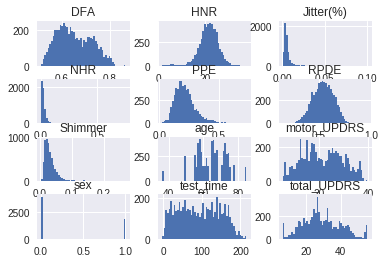

In [99]:
data.hist(bins=50)

In [0]:
import numpy as np
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


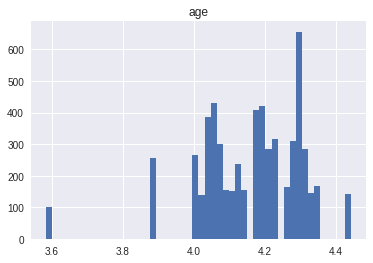

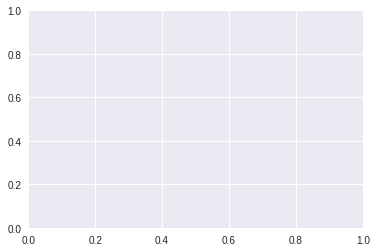

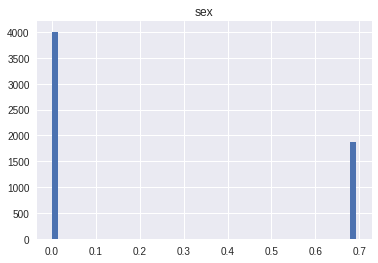

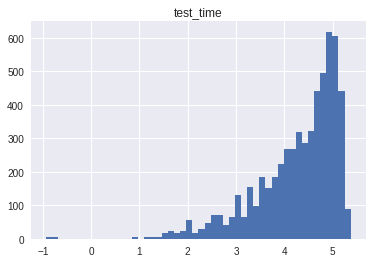

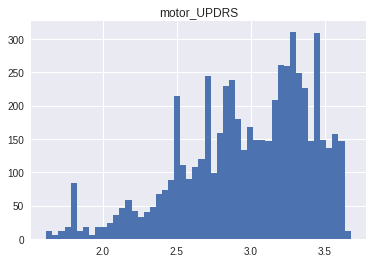

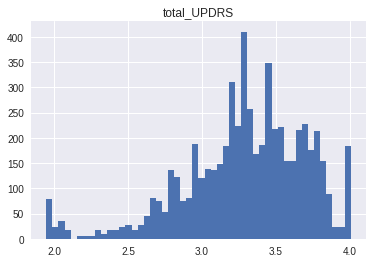

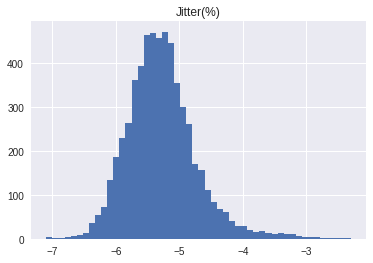

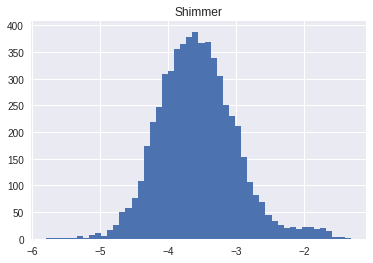

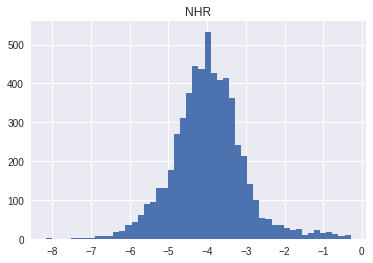

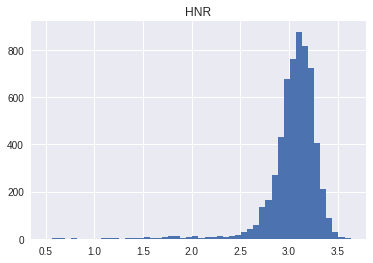

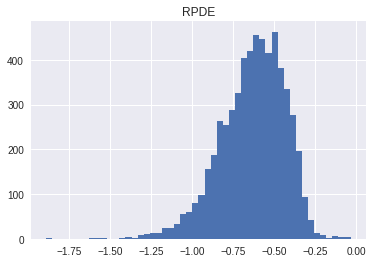

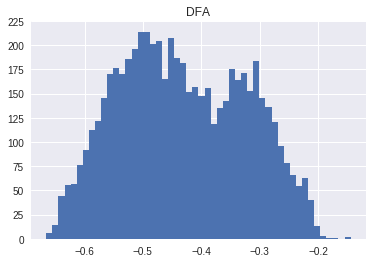

In [101]:
for key in data.drop(['PPE'], axis=1).keys():
  try:
    ax = plt.figure()
    ax = np.log(data[key]).hist(bins=50)
    ax.plot()
    plt.title(key)
    data[key] = np.log(data[key])
  except:
    ax = plt.figure()
    ax = np.log(data[key] + 1).hist(bins=50)
    ax.plot()
    plt.title(key)
    data[key] = np.log(data[key] + 1)

In [102]:
data.isnull().any()

age            False
sex            False
test_time       True
motor_UPDRS    False
total_UPDRS    False
Jitter(%)      False
Shimmer        False
NHR            False
HNR            False
RPDE           False
DFA            False
PPE            False
dtype: bool

In [103]:
data.isnull().any().sum()

1

In [0]:
data.dropna(inplace=True)

In [105]:
data.describe()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Shimmer,NHR,HNR,RPDE,DFA,PPE
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,4.161531,0.220724,4.269254,2.972254,3.289401,-5.276545,-3.563787,-3.974571,3.049546,-0.632045,-0.431640,0.219618
std,0.144836,0.322944,0.867239,0.437819,0.418705,0.550504,0.575495,0.932060,0.260207,0.196269,0.107990,0.091494
min,3.583519,0.000000,-0.926770,1.616950,1.945910,-7.094085,-5.789340,-8.159519,0.506215,-1.890343,-0.665454,0.021983
25%,4.060443,0.000000,3.857261,2.708050,3.061614,-5.632392,-3.957544,-4.514188,2.965479,-0.755672,-0.517347,0.156385
50%,4.174387,0.000000,4.519111,3.038361,3.314986,-5.318520,-3.592479,-3.992799,3.087263,-0.612028,-0.440756,0.205560
75%,4.276666,0.693147,4.930581,3.317598,3.594583,-4.990833,-3.224517,-3.458911,3.196446,-0.487687,-0.340408,0.264590
max,4.442651,0.693147,5.372915,3.676579,4.007188,-2.302685,-1.314420,-0.290005,3.634291,-0.034509,-0.144332,0.731730


In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, GridSearchCV

X = data.drop(['PPE'], axis=1).values
Y = data['PPE'].values

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.2)

In [0]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

In [0]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=1)),
    ("lr", SGDRegressor())
])

In [109]:
params = {
    "poly__degree":[1,2,3,4]
}

grid = GridSearchCV(pipe, params, cv=5, verbose=-1, n_jobs=-1, scoring='neg_mean_squared_error')
grid.fit(trainX, trainY)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('lr', SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
   ...m_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'poly__degree': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=-1)

In [110]:
grid.best_params_

{'poly__degree': 1}

In [111]:
grid.best_score_

-0.0019629334591670425

In [112]:
kfold = KFold(shuffle=True, n_splits=10)
score = cross_val_score(pipe, trainX, trainY, cv=kfold, scoring='neg_mean_squared_error')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None.

In [113]:
score.mean()

-0.0019520088479332703

In [0]:
from sklearn.metrics import r2_score

In [115]:
pipe.fit(trainX, trainY)

print(r2_score(testY, pipe.predict(testX)))

0.7627437420266528


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   4 | elapsed:    0.0s remaining:    0.0s


[learning_curve] Training set sizes: [   1 1000 2000 3752]


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished


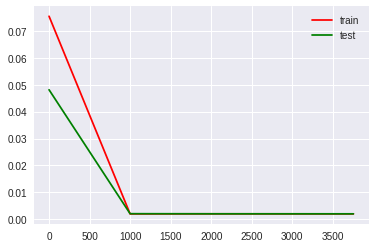

In [116]:
train_sizes = [1,1000,2000,3752]

train_size, train_score, test_score = learning_curve(
  estimator=pipe,
  X=trainX,
  y=trainY,
  cv=5,
  n_jobs=-1,
  verbose=3,
  train_sizes=train_sizes,
  scoring='neg_mean_squared_error'
)

mean_train = -train_score.mean(axis=1)
mean_test = -test_score.mean(axis=1)

plt.plot(train_size, mean_train, 'r-', label='train')
plt.plot(train_size, mean_test, 'g-', label='test')

plt.legend()

plt.show()

Now looking at our linear regression model, we noticed that it got about 75% correct.  Now for our task, predicting parkinson's with only a score of 75% is pretty bad.  We are going to try to aim for about 90% or more.

But before we just use a random forest model, and call it a day (random forest will most likely work well), we are going to try to explain why linear regression did not work on our data.

Looking back at our learning curve, we found that since our model converged with the high bias, it was underfitting our data.  In order to discover exactly why our model was underfitting our data, we need to revisit the 5 assumptions of linear regression.

1. The data has a linear relationship.
2. The data has a normal distribution. (or close to it).
3. Our data has little to no correlation in the predictors.
4. Our data has a low variance / standard deviation.
5. Our data has no autocorrelation.

Now lets review each of these one by one.

Looking at our data, we discovered that it has a linear relationship of 1 degree.  This was discovered when we used the grid search to find the degree of the function.  Another reason is that we could assume that most likely the data would underfit a lot more if the data was not even linear to begin with.

Our data also has a very normal distribution.   Aside from the few predictors that are slightly skewed to the left or right, our data isn't widly distributed.  This may be a reason for underperforming, but it is unlikely the main reason.

While our predictors did have some correlation in the predictors, we examined this, and removed them from the data.  So, it is unlikely that this is one of the reasons why.

Fourth, our data need to have a low variance / standard deviation.  Looking back at the test we did earlier, we found that our data actually does have a somewhat high variance (about 50% of the data).  This would most likely be the real reason for our underperforming, as it would also explain the fact that we didn't underfit a lot, but just enough to not be very accurate.

Lastly is autocorrelation.  We are just going to assume that since our independant variables are clearly independant of each other, that there is little to no autocorrelation.

Another thing worth considering with linear regression is that it is greatly affected by outliers.  So, lets try to find how much of the data are ourliers, and how large those outliers are.

In [117]:
outliers = data[~(np.abs(data['PPE'] - data['PPE'].mean()) > (3 * data['PPE'].std()))]

len(outliers) / len(data)

0.9872079140371823

Oddly enough, most of our data is considered outliers.  This is due to the high variance of our data (just like we said).  Now lets find how large these outliers are.

In [118]:
outliers['PPE'].mean()

0.21528164426399446

Based on the average value of the outliers vs. the average value of the normal data, we can determine that none of our data has significantly large outliers.  Once again, this is a result of high variance in the data.

So, now that we have actually diagnosed our problem (high variance), we can easily pick what model to use next, as we can chose one that directly addressed the flaws of the linear regression. (See!  Actually doing some dawta science and not just blindly building models untill we get a good score).

Based on the high variance that we saw in the data, we have decided that next we will try a SVM with a RBF kernel.  The reason is that RBF kernel's have the ability to pick our boundaries that we not nessisarily linear, but also not necessarily of a higher degree.  This is perfect for our problem.

In [0]:
from sklearn.svm import SVR

pipe2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel='rbf', gamma=0.01, C=0.1))
])

In [120]:
params = {
    "svr__C":[0.1, 0.01, .0010, .000100]
}

grid = GridSearchCV(pipe2, params, cv=5, verbose=3, n_jobs=-1)
grid.fit(trainX, trainY)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svr__C': [0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [121]:
grid.best_params_

{'svr__C': 0.1}

In [122]:
score = cross_val_score(pipe2, trainX, trainY, cv=kfold, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)  #we are using the same kfold var. as earlier since nothing changed.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [123]:
score.mean()

-0.001980233813740992

In [124]:
pipe2.fit(trainX, trainY)

print(r2_score(testY, pipe2.predict(testX)))

0.7605404400780296


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


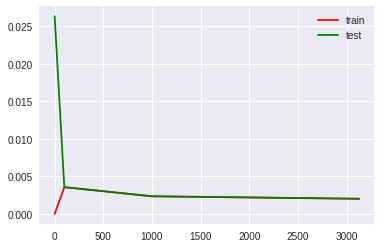

In [125]:
train_sizes = [1,100,1000,3126]

train_size, train_score, test_score = learning_curve(
  estimator=pipe2,
  X=trainX,
  y=trainY,
  train_sizes=train_sizes,
  scoring='neg_mean_squared_error'
)

mean_train = -train_score.mean(axis=1)
mean_test = -test_score.mean(axis=1)

plt.plot(train_size, mean_train, 'r-', label='train')
plt.plot(train_size, mean_test, 'g-', label='test')
plt.legend()
plt.show()

Oh-no!  It appears that even after optimizing our RBF kernel, we still scored around the same amount.  There could be a few reasons for our variance.  One is that our sample size of simply too small.  It is worth noting here that the less data you have, the more common high variance is.  

Now looks like it's time to break our the big guns (by this we mean the ensemble models).  We are going to start by usinig random forest models.  Keep in mind that when using the linear models, we removed predictors with high correlations, but random forest isn't bothered by this.  So, we are going to import the data again, and train a model without scaling our removing any of the data (except null values).

In [0]:
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("parkinsons_updrs.csv").drop(['subject#'], axis=1)

In [127]:
rf = RandomForestRegressor(n_estimators=250)

score = cross_val_score(rf, trainX, trainY, cv=2, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


In [128]:
score.mean()

-0.0015093972654124429

In [129]:
rf.fit(trainX, trainY)
print(r2_score(testY, rf.predict(testX)))

0.8255559885437294


We got an 82% with a random forest model.  This is actually considered an indictor that the data we are using is just garbage.  The reason is that RF is an extremely powerful model, as it has a lot of great things going for it that other models do not.  Another reason is that don't have very many samples of data.  This is another indicator of crappy data.  Another reason is the large number of outliers, and a high variance.  So, in this stage of the project, we would go back and try to get more data.  And if despite a large amount of data, our dataset was still bad, we would then go and try to find problems with the source that we are getting our data.